# Homework 06: Nonlinear Optimization/Traveling Salesperson

MSCA 32013 Optimization and Simulation Methods. University of Chicago.

Group 7. Ben Ossyra, Peter Pezon. Yawen Zhang. 

## Q. 1. Part 1-0.

Consider the following univariate function: $ f(x) = 3x^2 + 4x + 1 $ . You are tasked with finding the minimum of the function $f$ in the interval $[−2,1]$.

**Determine the type of optimization problem**

This is boxed constrained convex optimization problem. It is called boxed constrained because the control variable $x$ is restricted by lower and upper bounds $\{ x: -2 \leq x \leq 1 \}$.

**Explain why a minimum exists in this optimization problem**

The Weierstras theorem establsihes conditions for the existence of a solution  in this optimization problem. It states that if $f$ is continuous and $Ω ⊆ R^n$ is compact, then a solution exists. We can say that $f$ is continuous in the range [-2,1] for every point x in [-2,1]. We can see in the plot below that $f$ is smooth and continuous. We can say that the set  $Ω ⊆ R^n$ is compact if it is closed and bounded; in this problem $x$ is bounded $\{ x: -2 \leq x \leq 1 \}$ and it includes boundaries $-2$ and $1$, therefore $Ω$ is a closed set. Therefore, we've established that a solution exists for the problem. Having established that a solution exists, the solution can then be characterized as a minimum.

In convex optimization problems, the objective function is optimzied when local minimum and global minimum solutions coincide.

**Characterize the local minimum assuming it is an interior point (i.e., first order necessary condition)**

Say $x*$ is an interior point. If $𝑥∗$ is a local minimum point of $f$ over $Ω$ then for any $d ∈ 𝐸^n$ that is a feasible direction at $x*$, ∇𝑓(𝑥∗)𝑑≥0. Meaning: at the minima, if $x*$ is a local minima, then at any incremental change $d$ in either direction of $x$ results only in an increase in the value of $f(x)$. Secondly, a vector $d$ in $E^n$ is a feasible direction at $𝑥 ∈ Ω$ if there is an $ a > 0 $ such that $x + ad ∈ Ω $ for all $a ∈ 0 \leq a \leq a$. These first order conditions establish that if $x*$ is a local minimum, then any movement away from $x*$ results in a higher value for the objective function $f$. The second requirement that the direction $d$ away from the local optimal $x*$ be feasible essentially rules out corner cases where the all points around $x$ increase $f$ but would result in $x$ values outside the feasible region $Ω$.

Further, an optimal interior solution to the feasible set $Ω$ implies that $ ∇f(x*) = 0 $. In this special case, the first order conditions yield $n$ equation for $n$ unknowns which can be used to find the optimal solution.
 
**Based on the first order condition above, find the value of $x$ that minimizes $f(x)$  using simple algebra**

$ \min_{x}{f(x) = 3x^2 + 4x + 1} $

$ ∇f(x*) = 0 $

$ \frac{d}{dx} 3(x*)^2 + 4(x*) + 1 = 0 $

$ 6x + 4 = 0 $

$ x = -\frac{2}{3} $

**Evaluate $f(x)$ at the optimal $x$**

$ f(x) = 3x^2 + 4x + 1$

$ f(-\frac{2}{3}) = 3(-\frac{2}{3})^2 - 4(\frac{2}{3}) + 1$

$ f(-\frac{2}{3}) = -\frac{1}{3} $

**Use Optim in Julia to find the minimum $x$**


In [26]:
using Optim

f(x) = 3*x[1]^2 + 4*x[1] + 1

x0 = [-2.0, 1.0]
optimize(f, x0)

 * Status: success

 * Candidate solution
    Final objective value:     -3.333333e-01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    21
    f(x) calls:    40


The `Optim` package find the minimum value at $-0.333$ or $-\frac{1}{3}$, confirming the objective function value found earlier. 

**Plot the function $f(x)$  in the range $[−2,1]$**

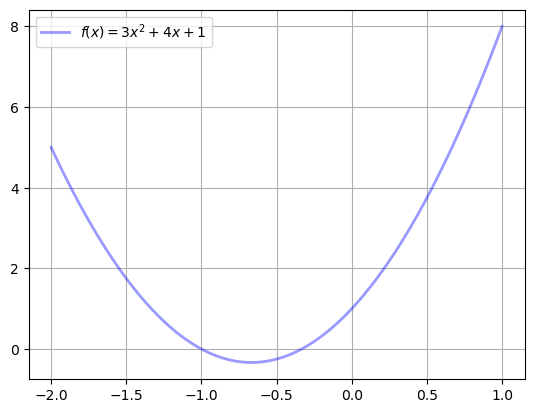

In [27]:
using PyPlot

x1 = collect(-2:0.01:1)
f1 = 3 .* (x1.^2) + 4 .* x1 .+ 1

fig, ax = subplots()

ax.plot(x1, f1,
    color="blue",
    linewidth=2,
    label=L"f(x) = 3x^2 + 4x + 1",
    alpha=0.4)
ax.legend(loc="upper left");
ax.grid("on");

## Q. 1. Part 1-1

Write a Julia code for 𝑓(𝑥) and 𝐷𝑓(𝑥). Run the Newthon-Raphson method and search for the solution. Prepare a table with values for 𝑥, 𝑓(𝑥), 𝐷𝑓<sup>-1</sup> (𝑥), and 𝑒𝑟𝑟 for each iteration. Explain what is happening during the iterations. Is the algorithm converging? Why or why not? Choose your initial values carefully.

$$ 𝑓1(𝑥_{1},𝑥_{2},𝑥_{3})=𝑥_{1}+𝑥_{2}+𝑥_{3}^2−12 $$  
$$ 𝑓2(𝑥_{1},𝑥_{2},𝑥_{3})=𝑥_{1}^2−𝑥_{2}+𝑥_{3}−2 $$  
$$ 𝑓3(𝑥_{1},𝑥_{2},𝑥_{3})=2𝑥_{1}^2−𝑥_{2}^2+𝑥_{3}−1 $$    

$\frac{\partial f_{1}(x_{n,1},x_{n,2},x_{n,3})}{\partial x_{1}} = 1$  
$\frac{\partial f_{1}(x_{n,1},x_{n,2},x_{n,3})}{\partial x_{2}} = 1$  
$\frac{\partial f_{1}(x_{n,1},x_{n,2},x_{n,3})}{\partial x_{3}} = 2x_{3}$	

$\frac{\partial f_{2}(x_{n,1},x_{n,2},x_{n,3})}{\partial x_{1}} = 2x_{1}$  
$\frac{\partial f_{2}(x_{n,1},x_{n,2},x_{n,3})}{\partial x_{2}} = -1$  
$\frac{\partial f_{2}(x_{n,1},x_{n,2},x_{n,3})}{\partial x_{3}} = 1$	

$\frac{\partial f_{3}(x_{n,1},x_{n,2},x_{n,3})}{\partial x_{1}} = 4x_{1}$  
$\frac{\partial f_{3}(x_{n,1},x_{n,2},x_{n,3})}{\partial x_{2}} = -2x_{2}$  
$\frac{\partial f_{3}(x_{n,1},x_{n,2},x_{n,3})}{\partial x_{3}} = 1$  



In [29]:
using DataFrames

tol = 10.0^(-10)
err = 10.0^5
x0 = [1.0; 1.0; 1.0]

x = copy(x0)

function g1(x)
    [x[1]+x[2]+x[3]^2-12; x[1]^2-x[2]+x[3]-2; 2*x[1]^2-x[2]^2+x[3]-1]
end

function Dg1(x)
    [1 1 2*x[3];
    2*x[1] -1 1;
    4*x[1] -2*x[2] 1]
end

k = 0
resual = DataFrame(k=NaN,x=NaN,f=NaN,invDf1=NaN,invDf2=NaN,invDf3=NaN,inverr=NaN)


while err>tol
    x = x0 - inv(Dg1(x0))*g1(x0)
    err = maximum(abs.(x-x0))
    if k==0
#        resual = DataFrame(k=[k;k],x=x0,f=g1(x0),invDg1=inv(Dg1(x0))[:,1],invDf2=inv(Dg1(x0))[:,1],err=x-x0)
        resual = DataFrame(k=k,x=x0[1,1,1],f=g1(x0)[1,1,1],invDf1=inv(Dg1(x0))[1,1],invDf2=inv(Dg1(x0))[1,2],
            invDf3=inv(Dg1(x0))[1,3], err=x[1,1]-x0[1,1])
        push!(resual, ([k,x0[2,1],g1(x0)[2,1],inv(Dg1(x0))[2,1],inv(Dg1(x0))[2,2],inv(Dg1(x0))[2,3],x[2,1]-x0[2,1]]))
        push!(resual, ([k,x0[3,1],g1(x0)[3,1],inv(Dg1(x0))[3,1],inv(Dg1(x0))[3,2],inv(Dg1(x0))[3,3],x[3,1]-x0[3,1]]))
    else
#        push!(resual, @data([[k,k] x0 f(x0) inv(Df(x0)) x-x0]))
        push!(resual, ([k,x0[1,1],g1(x0)[1,1],inv(Dg1(x0))[1,1],inv(Dg1(x0))[1,2],inv(Dg1(x0))[1,3],x[1,1]-x0[1,1]]))
        push!(resual, ([k,x0[2,1],g1(x0)[2,1],inv(Dg1(x0))[2,1],inv(Dg1(x0))[2,2],inv(Dg1(x0))[2,3],x[2,1]-x0[2,1]]))
        push!(resual, ([k,x0[3,1],g1(x0)[3,1],inv(Dg1(x0))[3,1],inv(Dg1(x0))[3,2],inv(Dg1(x0))[3,3],x[3,1]-x0[3,1]]))
    end
    x0 = x
    k = k + 1
end
resual

Row,k,x,f,invDf1,invDf2,invDf3,err
,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,0,1.0,-9.0,0.333333,-1.66667,1.0,0.333333
2,0,1.0,-1.0,0.666667,-2.33333,1.0,2.66667
3,0,1.0,1.0,0.0,2.0,-1.0,3.0
4,1,1.33333,9.0,-0.0604454,0.569459,-0.0858961,-0.110993
5,1,3.66667,0.111111,-0.0254507,0.397667,-0.194062,-1.152
6,1,4.0,-6.88889,0.135737,-0.120891,0.0349947,-0.967126
7,2,1.22234,0.935333,-0.104801,0.819474,-0.183777,-0.151433
8,2,2.51467,0.0123195,-0.0635849,0.745371,-0.359681,-0.418179
9,2,3.03287,-1.30246,0.19262,-0.25798,0.0895944,-0.0602929


### Explanation

The Newton-Raphson method is an iterative algorithm that uses the Talor series to find a root, the value of x when f(x) = 0. The Taylor series of f(x) about $ x= x_{0} + \epsilon$ can be approximated as: 
$$f(x) \sim f(x_{0}) + f'(x_{0}) * \epsilon $$
For a very small $\epsilon$, $-\frac{f(x_{0})}{f'(x_{0})}$ represents the change in $x_{0}$ or delta needed for $f(x_{0} + \epsilon) = 0$  
<br>
The code above starts with intial values of $x_{n}$ and subtracts $\frac{f(x_{n})}{f'(x_{n})}$ to calculate $x_{n+1}$. The error term is the absolute difference between $x_{n}$ and $x_{n+1}$.  
<br>
During the next iteration, the intial values are $x_{n+1}$ and we subtract $\frac{f(x_{n+1})}{f'(x_{n+1})}$ to calculate $x_{n+2}$. We continue to iterate through this process until the x values converge and the error term, the absolute difference between $x_{n}$ and $x_{n+1}$, is smaller than our established threshold, in this case $10^{-10}$.  
<br>
Our algorithm does converge, and we are left with the solution: 
$$x_{1} = 1$$
$$x_{2} = 2$$
$$x_{3} = 3$$
<br>
Our intial values were close to the root, so our algorithm converged. If initial values are chosen poorly the algorithm may not converge.

## Q. 1. Part 1-2

Derive the analytical version of the Newton-Raphson algorithm (including  𝑓(𝑥)  and  𝑓′(𝑥) ) for each expression below (separately). For each expression below, implement the Newton-Raphson algorithm, and find at least one root for each non-linear function below. Also plot  𝑓(𝑥)  around the solution(s). Prepare a data table with values for  𝑥 ,  𝑓(𝑥) ,  𝑓′(𝑥) , and  𝑒𝑟𝑟  for each iteration.

* $ 3𝑥^2−2𝑥−4=0 $  
* $ 𝑥−𝑒^{-x^2}=0 $    
* $ 𝑒^𝑥−𝑥^4=0 $

#### First equation

$ 3𝑥^2−2𝑥−4=0 $  
$ f'(x) = 6x -2 $

In [30]:
tol = 10.0^(-5)
err = 10.0^5
x0 = 0.1

function f4(x)
    3*x^2 - 2x - 4
end

function f4p(x)
    6*x - 2
end

k = 0
resual = DataFrame(k=NaN,x=NaN,f=NaN,fp=NaN,err=NaN)

while err>tol
    x = x0 - f4(x0)/f4p(x0)
    err = abs(x-x0)
    if k==0
        resual = DataFrame(k=k,x=x0,f=f4(x0),fp=f4p(x0),err=err)
    else
        push!(resual, ([k,x0,f4(x0),f4p(x0),err]))
    end
    x0 = x
    k = k + 1
end
resual

Row,k,x,f,fp,err
,Int64,Float64,Float64,Float64,Float64
1,0,0.1,-4.17,-1.4,2.97857
2,1,-2.87857,26.6157,-19.2714,1.38109
3,2,-1.49748,5.72227,-10.9849,0.520923
4,3,-0.976554,0.814082,-7.85932,0.103582
5,4,-0.872972,0.0321875,-7.23783,0.00444711
6,5,-0.868525,5.93305e-5,-7.21115,8.2276e-6


In [31]:
root = resual[6,2]

-0.8685253194524183

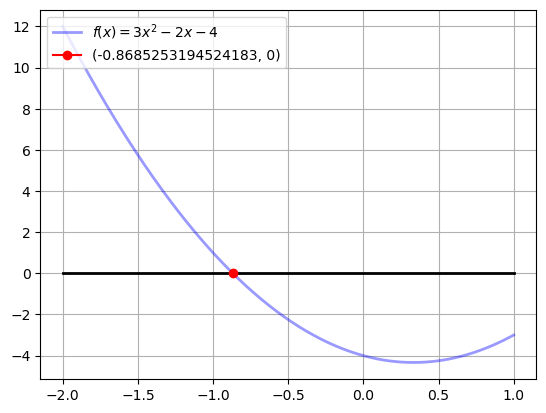

In [32]:
x = collect(-2 : 0.01 : 1)
p4 = 3 .* (x.^2) .- 2x .- 4

fig, ax = subplots()

ax.plot(x,p4,color="blue",linewidth=2,label=L"f(x) = 3x^2 - 2x -4",alpha=0.4)
ax.plot(x,zeros(length(x)),color="black",linewidth=2,alpha=1)
ax.plot(root,0,"-ro", alpha=1, label="($root, 0)")
ax.legend(loc="upper left");
ax.grid("on");

The graph confirms that the Newton-Raphson method successfully found a root. It looks like there is another root that could be found if we chose a different starting point. The Newton Raphson method will not always find the same solution across different starting values.

#### Second equation

$ 𝑥−𝑒^{-x^2}=0 $  
$ f'(x) = 2x\mathrm{e}^{-x^2}+1 $

In [33]:
tol = 10.0^(-5)
err = 10.0^5
x0 = 0.1

function f5(x)
    x - exp((-x^2))
end

function f5p(x)
    2*x*exp((-x^2))+1
end

k = 0
resual = DataFrame(k=NaN,x=NaN,f=NaN,fp=NaN,err=NaN)

while err>tol
    x = x0 - f5(x0)/f5p(x0)
    err = abs(x-x0)
    if k==0
        resual = DataFrame(k=k,x=x0,f=f5(x0),fp=f5p(x0),err=err)
    else
        push!(resual, ([k,x0,f5(x0),f5p(x0),err]))
    end
    x0 = x
    k = k + 1
end
resual

Row,k,x,f,fp,err
,Int64,Float64,Float64,Float64,Float64
1,0,0.1,-0.89005,1.19801,0.74294
2,1,0.84294,0.351566,1.8284,0.192281
3,2,0.65066,-0.00418438,1.85216,0.00225919
4,3,0.652919,5.05268e-7,1.85261,2.72734e-7


In [34]:
root = resual[4,2]

0.6529189131531786

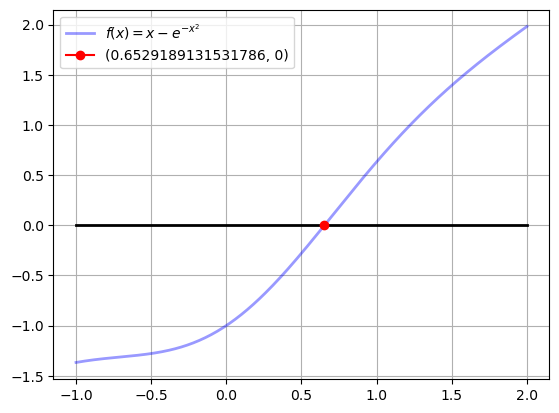

In [35]:
x = collect(-1 : 0.01 : 2)
p5 = x .- exp.((-x.^2))

fig, ax = subplots()

ax.plot(x,p5,color="blue",linewidth=2,label=L"f(x) = x - e^{-x^2}",alpha=0.4)
ax.plot(x,zeros(length(x)),color="black",linewidth=2,alpha=1)
ax.plot(root,0,"-ro", alpha=1, label="($root, 0)")
ax.legend(loc="upper left");
ax.grid("on");

The graph confirms that the Newton-Raphson method successfully found a root.

#### Third equation

$ 𝑒^𝑥−𝑥^4=0 $  
$ f'(x) = \mathrm{e}^x-4x^3 $

In [36]:
tol = 10.0^(-5)
err = 10.0^5
x0 = 0.1

function f6(x)
    exp(x) - x^4
end

function f6p(x)
    exp(x) - 4 * (x^3)
end

k = 0
resual = DataFrame(k=NaN,x=NaN,f=NaN,fp=NaN,err=NaN)

while err>tol
    x = x0 - f6(x0)/f6p(x0)
    err = abs(x-x0)
    if k==0
        resual = DataFrame(k=k,x=x0,f=f6(x0),fp=f6p(x0),err=err)
    else
        push!(resual, ([k,x0,f6(x0),f6p(x0),err]))
    end
    x0 = x
    k = k + 1
end
resual

Row,k,x,f,fp,err
,Int64,Float64,Float64,Float64,Float64
1,0,0.1,1.10507,1.10117,1.00354
2,1,-0.903542,-0.261356,3.35569,0.0778845
3,2,-0.825657,-0.0267812,2.68938,0.00995813
4,3,-0.815699,-0.00038057,2.61328,0.000145629
5,4,-0.815553,-7.99649e-8,2.61218,3.06123e-8


In [37]:
root = resual[5,2]

-0.8155534494212614

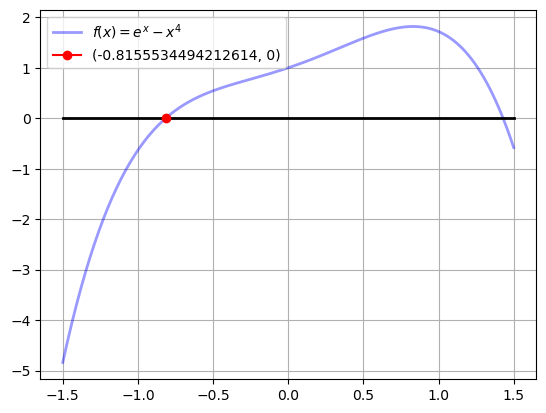

In [38]:
x = collect(-1.5 : 0.01 : 1.5)
p6 = exp.(x) .- (x.^4)

fig, ax = subplots()

ax.plot(x,p6,color="blue",linewidth=2,label=L"f(x) = e^x - x^4",alpha=0.4)
ax.plot(x,zeros(length(x)),color="black",linewidth=2,alpha=1)
ax.plot(root,0,"-ro", alpha=1, label="($root, 0)")
ax.legend(loc="upper left");
ax.grid("on");

The graph confirms that the Newton-Raphson method successfully found a root. There is another root that could be found if we chose a different starting point. The Newton Raphson method will not always find the same solution across different starting values.

### Traveling Salesperson Problem

In [39]:
using JuMP, GLPK

cities = Dict(
    1 => "New York",
    2 => "Los Angeles",
    3 => "Chicago",
    4 => "Minneapolis",
    5 => "Denver",
    6 => "Dallas",
    7 => "Seattle",
    8 => "Boston",
    9 => "San Francisco", 
    10 => "St. Louis",
    11 => "Houston",
    12 => "Phoenix",
    13 => "Salt Lake City"
)

c = reshape(
    [
        0, 2451, 713, 1018, 1631, 1374, 2408, 213, 2571, 875, 1420, 2145, 1972,
        2451, 0, 1745, 1524, 831, 1240, 959, 2596, 403, 1589, 1374, 357, 579,
        713, 1745, 0, 355, 920, 803, 1737, 851, 1858, 262, 940, 1453, 1260,
        1018, 1524, 355, 0, 700, 862, 1395, 1123, 1584, 466, 1056, 1280, 987,
        1631, 831, 920, 700, 0, 663, 1021, 1769, 949, 796, 879, 586, 371,
        1374, 1240, 803, 862, 663, 0, 1681, 1551, 1765, 547, 225, 887, 999,
        2408, 959, 1737, 1395, 1021, 1681, 0, 2493, 678, 1724, 1891, 1114, 701,
        213, 2596, 851, 1123, 1769, 1551, 2493, 0, 2699, 1038, 1605, 2300, 2099,
        2571, 403, 1858, 1584, 949, 1765, 678, 2699, 0, 1744, 1645, 653, 600,
        875, 1589, 262, 466, 796, 547, 1724, 1038, 1744, 0, 679, 1272, 1162,
        1420, 1374, 940, 1056, 879, 225, 1891, 1605, 1645, 679, 0, 1017, 1200,
        2145, 357, 1453, 1280, 586, 887, 1114, 2300, 653, 1272, 1017, 0, 504,
        1972, 579, 1260, 987, 371, 999, 701, 2099, 600, 1162, 1200, 504, 0
    ],
    (13, 13)
)

m = Model(GLPK.Optimizer)

N = length(cities)

#add decision variables
@variable(m, x[1:N, 1:N], Bin)

#add auxiliary variables
@variable(m, u[1:N], Int)

for i=1:N 
    @constraint(m, x[i,i] == 0) #can't stay in city
end

for i=1:N 
    @constraint(m, sum(x[i,1:N]) == 1) #can only leave city once
end

for j=1:N
    @constraint(m, sum(x[1:N,j]) == 1) #can only arrive in city once
end


@constraint(m, [i in 1:N, j in 2:N], u[j] + (N-2) >= u[i] + (N-1) * x[i,j]) # no subtours

for i in 1:N
    @constraint(m, u[i] >= 1)
end

@objective(m, Min, sum(c[i,j]*x[i,j] for i=1:N,j=1:N))



2451 x[1,2] + 713 x[1,3] + 1018 x[1,4] + 1631 x[1,5] + 1374 x[1,6] + 2408 x[1,7] + 213 x[1,8] + 2571 x[1,9] + 875 x[1,10] + 1420 x[1,11] + 2145 x[1,12] + 1972 x[1,13] + 2451 x[2,1] + 1745 x[2,3] + 1524 x[2,4] + 831 x[2,5] + 1240 x[2,6] + 959 x[2,7] + 2596 x[2,8] + 403 x[2,9] + 1589 x[2,10] + 1374 x[2,11] + 357 x[2,12] + 579 x[2,13] + 713 x[3,1] + 1745 x[3,2] + 355 x[3,4] + 920 x[3,5] + 803 x[3,6] + 1737 x[3,7] + 851 x[3,8] + 1858 x[3,9] + 262 x[3,10] + 940 x[3,11] + 1453 x[3,12] + 1260 x[3,13] + 1018 x[4,1] + 1524 x[4,2] + 355 x[4,3] + 700 x[4,5] + 862 x[4,6] + 1395 x[4,7] + 1123 x[4,8] + 1584 x[4,9] + 466 x[4,10] + 1056 x[4,11] + 1280 x[4,12] + 987 x[4,13] + 1631 x[5,1] + 831 x[5,2] + 920 x[5,3] + 700 x[5,4] + 663 x[5,6] + 1021 x[5,7] + 1769 x[5,8] + 949 x[5,9] + 796 x[5,10] + 879 x[5,11] + 586 x[5,12] + 371 x[5,13] + 1374 x[6,1] + 1240 x[6,2] + 803 x[6,3] + 862 x[6,4] + 663 x[6,5] + 1681 x[6,7] + 1551 x[6,8] + 1765 x[6,9] + 547 x[6,10] + 225 x[6,11] + 887 x[6,12] + 999 x[6,13] + 2408

In [40]:
optimize!(m)

In [41]:
obj = JuMP.objective_value(m)

println("Objective value: ", obj)
for variable in all_variables(m)
    if value(variable) != 0
        println("$(name(variable)) = $(value(variable))")
    end
end



Objective value: 7293.0
x[8,1] = 1.0
x[12,2] = 1.0
x[4,3] = 1.0
x[5,4] = 1.0
x[13,5] = 1.0
x[10,6] = 1.0
x[9,7] = 1.0
x[3,8] = 1.0
x[2,9] = 1.0
x[1,10] = 1.0
x[6,11] = 1.0
x[11,12] = 1.0
x[7,13] = 1.0
u[1] = 1.0
u[2] = 6.0
u[3] = 12.0
u[4] = 11.0
u[5] = 10.0
u[6] = 3.0
u[7] = 8.0
u[8] = 13.0
u[9] = 7.0
u[10] = 2.0
u[11] = 4.0
u[12] = 5.0
u[13] = 9.0


In [42]:
counter = 1
i = 1
while counter <= 13
    println("from $(cities[i]) to $(cities[argmax(JuMP.value.(x)[i,:])])")
    i = argmax(JuMP.value.(x)[i,:])
    counter += 1
end

from New York to St. Louis
from St. Louis to Dallas
from Dallas to Houston
from Houston to Phoenix
from Phoenix to Los Angeles
from Los Angeles to San Francisco
from San Francisco to Seattle
from Seattle to Salt Lake City
from Salt Lake City to Denver
from Denver to Minneapolis
from Minneapolis to Chicago
from Chicago to Boston
from Boston to New York
